In [1]:
import pandas as pd
import numpy as np
from scFormer_assets.model_scformer import TransformerModel
import torch
import scanpy as sc
import umap.umap_ as umap
import matplotlib.pyplot as plt
import random

In [2]:
# all gene embeddigns
vocab_dict = {
    "<eoc>": 1001,
    "<pad>": 999,
    "DIP2A": 998,
    "CSTB": 997,
    "MX1": 995,
    "BACE2": 993,
    "MORC3": 992,
    "N6AMT1": 990,
    "ATP5J": 989,
    "C21orf91": 988,
    "SCO2": 987,
    "MLC1": 986,
    "ALG12": 985,
    "TRMU": 984,
    "CBX7": 978,
    "APOBEC3F": 977,
    "IL2RB": 974,
    "APOL6": 973,
    "HMOX1": 972,
    "YWHAH": 971,
    "SMARCB1": 965,
    "GNB1L": 962,
    "ZNF544": 958,
    "ZNF274": 957,
    "ZNF135": 956,
    "ZNF134": 953,
    "ZNF667": 951,
    "LILRA4": 947,
    "ZNF480": 940,
    "CD33": 937,
    "KLK1": 936,
    "FCGRT": 932,
    "TMEM143": 930,
    "LIG1": 929,
    "ZNF606": 955,
    "ZNF180": 926,
    "ZNF227": 925,
    "CENPM": 982,
    "ZNF226": 924,
    "LYPD3": 923,
    "CD79A": 922,
    "BLVRB": 921,
    "SIRT2": 919,
    "ACTN4": 918,
    "FXYD7": 913,
    "FXYD1": 912,
    "ZNF302": 911,
    "KIAA0355": 910,
    "PLEKHF1": 907,
    "ZNF91": 905,
    "ZNF85": 902,
    "ZNF506": 901,
    "GATAD2A": 900,
    "SLC25A42": 899,
    "ISYNA1": 898,
    "MAST3": 896,
    "IL12RB1": 895,
    "CCDC130": 893,
    "HOOK2": 891,
    "YPEL1": 963,
    "ZNF136": 890,
    "ACP5": 889,
    "DNMT1": 887,
    "ZNF426": 885,
    "ZNF266": 884,
    "CD320": 883,
    "RETN": 882,
    "DENND1C": 879,
    "PTPRS": 878,
    "MATK": 877,
    "LSM7": 876,
    "MUM1": 875,
    "CFD": 873,
    "ZNF562": 886,
    "GZMM": 872,
    "STMN3": 868,
    "SYCP2": 867,
    "ZBP1": 865,
    "RBM38": 864,
    "TSHZ2": 863,
    "<cls>": 1000,
    "PKIG": 858,
    "BLCAP": 855,
    "CRNKL1": 849,
    "SIRPG": 846,
    "SERPINB10": 843,
    "ZCCHC2": 842,
    "SMAD7": 841,
    "RNF125": 839,
    "TIMP2": 836,
    "SYNGR2": 835,
    "UBE2O": 833,
    "SLC9A3R1": 830,
    "ABCA5": 829,
    "HELZ": 827,
    "RNF43": 823,
    "SCPEP1": 822,
    "MMD": 821,
    "TOB1": 820,
    "TBX21": 814,
    "TBKBP1": 813,
    "ACBD4": 812,
    "CCR10": 810,
    "CCR7": 809,
    "IGFBP4": 808,
    "IKZF3": 807,
    "PSMB3": 806,
    "DUSP14": 805,
    "SUZ12": 802,
    "EVI2A": 801,
    "ALDOC": 800,
    "LGALS9": 799,
    "GRAP": 798,
    "TNFRSF13B": 796,
    "CTSA": 860,
    "HS3ST3B1": 795,
    "CLEC10A": 791,
    "P2RX5": 789,
    "DBNDD1": 787,
    "MVD": 784,
    "KLHDC4": 783,
    "GAN": 779,
    "SMPD3": 778,
    "PRMT7": 777,
    "DPEP2": 776,
    "CENPT": 775,
    "ACD": 774,
    "CETP": 772,
    "HERPUD1": 771,
    "MT2A": 770,
    "CD19": 767,
    "IL4R": 766,
    "IGSF6": 765,
    "TMEM159": 764,
    "ARL6IP1": 762,
    "RRN3": 760,
    "DEXI": 758,
    "ATF7IP2": 757,
    "DNASE1": 755,
    "PRSS21": 753,
    "METRN": 752,
    "AXIN1": 751,
    "CRTC3": 748,
    "CTSH": 745,
    "MPI": 744,
    "ZWILCH": 742,
    "PARP16": 740,
    "USP8": 735,
    "PDIA3": 732,
    "GCHFR": 730,
    "RPUSD2": 729,
    "SLC12A6": 727,
    "CRIP2": 726,
    "CDCA4": 724,
    "CKB": 723,
    "ZNF652": 818,
    "BCL11B": 722,
    "IRF2BP1": 927,
    "GPR68": 719,
    "TNNT1": 950,
    "KIR2DL1": 949,
    "GPR65": 718,
    "BATF": 717,
    "NPC2": 715,
    "ENTPD5": 714,
    "PNMA1": 712,
    "XBP1": 969,
    "AKAP5": 711,
    "METTL4": 838,
    "ZBTB25": 710,
    "C5AR1": 928,
    "SYNE2": 709,
    "MNAT1": 708,
    "CNR2": 13,
    "SKIV2L": 334,
    "C6orf47": 333,
    "ARL4A": 378,
    "TNF": 332,
    "NIN": 699,
    "MICB": 331,
    "GNL1": 327,
    "UBQLN2": 436,
    "CD79B": 825,
    "HIST1H2BJ": 324,
    "HIST1H2AC": 320,
    "SPSB1": 5,
    "RAPGEF6": 288,
    "TBC1D17": 934,
    "GFOD1": 316,
    "KIFC3": 773,
    "PHACTR1": 315,
    "IL2RG": 437,
    "F13A1": 313,
    "ATP6V0E2": 414,
    "PNOC": 461,
    "RIPK1": 311,
    "RUFY1": 308,
    "CLK4": 307,
    "PRR7": 305,
    "RCBTB2": 683,
    "SFXN1": 301,
    "TRIM37": 824,
    "RHOBTB2": 456,
    "ATOX1": 298,
    "C1orf109": 22,
    "CXCL3": 249,
    "XPNPEP3": 980,
    "TAF13": 47,
    "ZNF468": 944,
    "VNN3": 367,
    "TGFBI": 292,
    "SEC31B": 612,
    "CSNK1G3": 286,
    "TMEM19": 656,
    "N4BP3": 306,
    "IQGAP2": 281,
    "ALDH1A1": 498,
    "CD180": 278,
    "PIM1": 345,
    "SP4": 382,
    "CD160": 60,
    "ANKRD11": 785,
    "BRD9": 267,
    "ZNF7": 485,
    "CDKN2AIP": 266,
    "CX3CR1": 187,
    "MAP9": 264,
    "VNN2": 368,
    "ATAD2": 480,
    "CDK5RAP2": 511,
    "SPRY1": 262,
    "DNAJB14": 257,
    "CSF1R": 296,
    "TSPAN5": 256,
    "IFNGR2": 991,
    "ARHGAP24": 253,
    "SYTL2": 568,
    "ATP10D": 244,
    "CD83": 317,
    "KLF3": 242,
    "CD38": 239,
    "PARP11": 619,
    "C1orf56": 64,
    "CBX1": 815,
    "ATP11B": 230,
    "CRELD1": 179,
    "ZMAT3": 229,
    "CRTAM": 582,
    "PPBP": 248,
    "ZAP70": 142,
    "UIMC1": 303,
    "RSRC1": 226,
    "ALOX5AP": 679,
    "PAQR3": 252,
    "FAM98A": 123,
    "RNASE2": 688,
    "CHST2": 221,
    "IER3": 329,
    "ZNF573": 917,
    "RASA2": 220,
    "PITPNC1": 828,
    "LAP3": 240,
    "GPR132": 725,
    "ASTE1": 218,
    "OSGEPL1": 160,
    "CSTA": 214,
    "ANKRD55": 276,
    "PHF21A": 539,
    "SIDT1": 211,
    "IRF7": 521,
    "CD96": 210,
    "SENP7": 207,
    "EIF5A2": 228,
    "C1orf174": 3,
    "SCT": 522,
    "BIRC3": 572,
    "RPS27L": 738,
    "CLDND1": 206,
    "DDX6": 581,
    "FGL2": 392,
    "RAB30": 566,
    "NSUN3": 205,
    "ZNF654": 204,
    "FHIT": 203,
    "IK": 294,
    "ASH1L": 71,
    "ANKH": 268,
    "ZNF160": 945,
    "PCBP4": 198,
    "HCG18": 326,
    "FCER1A": 79,
    "ASCL2": 525,
    "PDLIM1": 610,
    "RASSF1": 195,
    "NISCH": 199,
    "GOLGA3": 672,
    "ZNF281": 98,
    "DYNLT1": 374,
    "EIF1B": 189,
    "EPM2AIP1": 186,
    "TXK": 245,
    "IRAK4": 639,
    "KLRG1": 628,
    "CAPG": 137,
    "SERPINE2": 175,
    "CISH": 196,
    "EPHA4": 174,
    "DPYSL2": 458,
    "CHORDC1": 570,
    "XPC": 181,
    "G6PD": 454,
    "DNAJB2": 173,
    "OSM": 970,
    "ANKZF1": 172,
    "YPEL5": 121,
    "BARD1": 168,
    "CLDN15": 404,
    "VPREB3": 964,
    "ICOS": 166,
    "ZNF350": 939,
    "MORC4": 446,
    "S100A11": 66,
    "LY6E": 484,
    "PANK4": 2,
    "CBLL1": 407,
    "IL18RAP": 146,
    "KLRB1": 629,
    "SLC2A4RG": 869,
    "SMC6": 118,
    "CARHSP1": 756,
    "RAD9A": 559,
    "PLEKHB1": 565,
    "PDK1": 158,
    "TYROBP": 915,
    "MXI1": 613,
    "WDR76": 733,
    "DAD1": 689,
    "ESF1": 848,
    "HIST2H2BE": 62,
    "PGPEP1": 897,
    "TRMT11": 366,
    "CD2": 58,
    "IFT57": 208,
    "TOM1L2": 797,
    "PTTG1": 300,
    "BCAS2": 56,
    "STX11": 370,
    "CD247": 90,
    "ASGR1": 792,
    "RAD54L2": 197,
    "RIC3": 530,
    "DENND2D": 52,
    "MAFB": 856,
    "PRPF3": 63,
    "PECR": 169,
    "CEPT1": 51,
    "MTR": 112,
    "HIRA": 961,
    "MTG1": 618,
    "DDX58": 492,
    "DDX1": 117,
    "BASP1": 269,
    "IFI44L": 39,
    "OGFRL1": 355,
    "THAP1": 469,
    "TGFBR3": 41,
    "TRAF5": 105,
    "KIN": 588,
    "TTC31": 136,
    "CYP27A1": 171,
    "CEBPB": 861,
    "H1FX": 217,
    "GPA33": 88,
    "USP20": 516,
    "ZBTB38": 219,
    "ZNF430": 903,
    "DENND4A": 741,
    "GFI1": 43,
    "AP3M2": 468,
    "EREG": 251,
    "TTC33": 271,
    "DRAP1": 556,
    "CA6": 4,
    "PLEKHA1": 615,
    "DNASE1L3": 202,
    "IL7R": 270,
    "GADD45A": 36,
    "ZNF701": 942,
    "ZNF141": 234,
    "DMTF1": 393,
    "TCTA": 193,
    "TRAT1": 209,
    "METTL8": 157,
    "PRAF2": 432,
    "CDA": 10,
    "HIST1H2AE": 322,
    "FHL3": 23,
    "CCL4": 804,
    "CD1C": 75,
    "LY86": 314,
    "IPP": 27,
    "GCC1": 410,
    "HIST1H2BN": 325,
    "FOLR3": 564,
    "MNDA": 76,
    "GBP2": 40,
    "P2RY14": 224,
    "TBCCD1": 231,
    "KIF3A": 289,
    "FCGR2A": 86,
    "SIAH2": 222,
    "CD9": 620,
    "LLGL2": 832,
    "TUBB2A": 312,
    "JAK1": 35,
    "TMEM156": 243,
    "ZNF83": 943,
    "GLMN": 42,
    "BDH1": 232,
    "PCYOX1": 132,
    "CTNNB1": 190,
    "LRIG2": 55,
    "TTTY15": 960,
    "TCEAL4": 445,
    "RAF1": 180,
    "AZI2": 185,
    "SH2D2A": 73,
    "AQP9": 736,
    "PARP8": 273,
    "SERINC5": 283,
    "GSTCD": 259,
    "SLC25A38": 188,
    "MAL": 140,
    "ANXA1": 499,
    "BANK1": 258,
    "HERC5": 255,
    "SLC2A11": 966,
    "DENND4B": 69,
    "ABCA7": 874,
    "PLCH2": 1,
    "HIST1H1D": 323,
    "GCLM": 44,
    "RNF113A": 449,
    "STAM": 592,
    "GPS2": 794,
    "MMP17": 671,
    "HIST1H1E": 321,
    "CD81": 528,
    "HCLS1": 212,
    "ACYP1": 716,
    "IL6": 383,
    "S100A12": 68,
    "SFMBT1": 200,
    "ALG6": 33,
    "ITK": 299,
    "ZNF273": 391,
    "ZNF331": 946,
    "POU2F1": 89,
    "RHOC": 54,
    "IKZF2": 167,
    "EGR2": 600,
    "GIPC1": 894,
    "ZNF669": 114,
    "FXYD2": 576,
    "MARCH3": 287,
    "ZNF507": 908,
    "GP9": 216,
    "IFI6": 15,
    "TBCC": 348,
    "MARCKSL1": 17,
    "DPYD": 45,
    "PTCH2": 25,
    "VPS37B": 670,
    "FAM76A": 16,
    "LYL1": 892,
    "HOOK1": 32,
    "ZNF26": 673,
    "ARHGEF3": 201,
    "NDE1": 761,
    "NVL": 108,
    "KIAA0319L": 19,
    "CR2": 103,
    "MAP3K1": 277,
    "EIF4EBP1": 465,
    "NELL2": 640,
    "SMYD3": 113,
    "CHST12": 376,
    "FAM117A": 819,
    "ITPKB": 110,
    "CBR4": 265,
    "MKNK1": 28,
    "ANXA5": 261,
    "AOAH": 386,
    "ISG15": 0,
    "TBC1D19": 241,
    "B4GALT3": 84,
    "TSPO": 983,
    "ITGB3BP": 34,
    "SSBP3": 31,
    "MRFAP1L1": 237,
    "AIM2": 78,
    "NT5C": 831,
    "SATB1": 183,
    "FGR": 14,
    "ANKRA2": 279,
    "DNMT3A": 120,
    "CA11": 931,
    "RHOB": 119,
    "TRIM52": 310,
    "PCYT2": 837,
    "GCNT4": 280,
    "GSTM3": 48,
    "KIAA0907": 72,
    "ZNF780B": 920,
    "CD3G": 580,
    "RORC": 65,
    "PTGS2": 96,
    "CD63": 646,
    "SLC7A7": 690,
    "RASGRP3": 122,
    "POLR1D": 677,
    "CHI3L2": 53,
    "GNG3": 547,
    "FBXO2": 6,
    "CD244": 82,
    "CFP": 429,
    "USP11": 427,
    "DNAJC3": 685,
    "NAGK": 133,
    "TAF2": 478,
    "GZMK": 274,
    "CTSF": 558,
    "PCMTD2": 871,
    "PPOX": 83,
    "MFGE8": 747,
    "GCA": 156,
    "PMS1": 161,
    "GPX1": 192,
    "FCER1G": 85,
    "FCGR2B": 87,
    "PTX3": 225,
    "NOC3L": 608,
    "MYBL2": 857,
    "FCRL2": 74,
    "SNIP1": 21,
    "FAM53B": 616,
    "ABL2": 92,
    "GIMAP6": 415,
    "ID1": 852,
    "ID3": 12,
    "HCK": 853,
    "EML4": 127,
    "BCS1L": 170,
    "NCF2": 94,
    "ITM2C": 176,
    "C1orf21": 95,
    "ST8SIA1": 636,
    "HELLS": 609,
    "RGS2": 97,
    "TLR2": 263,
    "REXO2": 575,
    "ACP6": 61,
    "CENPQ": 350,
    "PIK3C2B": 101,
    "SPIB": 935,
    "ARPC5L": 513,
    "QPCT": 125,
    "G0S2": 104,
    "FAM3C": 409,
    "ATF3": 106,
    "ZNF35": 191,
    "CD5": 544,
    "ANKRD49": 571,
    "DGKD": 177,
    "CHM": 440,
    "REXO4": 517,
    "SLC14A1": 840,
    "BPNT1": 107,
    "ECHDC2": 30,
    "CNIH4": 109,
    "LAX1": 100,
    "PITPNB": 968,
    "DDX46": 291,
    "POLM": 387,
    "LDHA": 534,
    "UNC93B1": 563,
    "NXPH4": 650,
    "RNF44": 302,
    "SH3YL1": 115,
    "KIR2DL3": 948,
    "RASGRP1": 728,
    "MSH2": 128,
    "DUSP2": 141,
    "TSPYL2": 433,
    "GPX7": 29,
    "CEBPZ": 124,
    "FCN1": 518,
    "S100P": 236,
    "RBBP5": 102,
    "SAV1": 698,
    "IER5": 93,
    "PYHIN1": 77,
    "DHX57": 126,
    "TESC": 667,
    "ATP8B2": 70,
    "CDC25B": 847,
    "PLCG2": 780,
    "LIMS2": 153,
    "CLASP1": 151,
    "ZCWPW1": 403,
    "OXCT1": 272,
    "MPHOSPH10": 134,
    "CGRRF1": 703,
    "IL32": 754,
    "ANXA6": 297,
    "PDE9A": 996,
    "CD8A": 138,
    "HLA-DPB1": 339,
    "GRAP2": 979,
    "MGAT4A": 143,
    "ALDH2": 665,
    "KRCC1": 139,
    "TNFRSF1B": 7,
    "NT5E": 357,
    "ZNF493": 904,
    "GABARAP": 793,
    "CHMP7": 457,
    "YARS": 18,
    "ZNF528": 941,
    "CASP8AP2": 359,
    "TSGA10": 144,
    "AEBP1": 388,
    "FHL2": 147,
    "GCC2": 148,
    "CLK1": 164,
    "PDSS2": 361,
    "TUBB1": 866,
    "MRPL23": 524,
    "PTPN4": 150,
    "SLC4A2": 418,
    "GYPC": 152,
    "TTN": 159,
    "KPNA5": 365,
    "IFT88": 676,
    "FAM46C": 59,
    "ADRB2": 295,
    "S100A9": 67,
    "KCNA3": 50,
    "MBD5": 154,
    "STAT4": 162,
    "COQ10B": 163,
    "CD226": 844,
    "CCR6": 375,
    "MX2": 994,
    "PTPN7": 99,
    "PSMB9": 336,
    "TRAF6": 536,
    "FBXO34": 705,
    "DHRS3": 8,
    "HLA-DMB": 337,
    "RGL2": 340,
    "ZNF76": 341,
    "ZNF675": 906,
    "PRDM1": 360,
    "TOP2B": 184,
    "GMCL1": 130,
    "TIMP1": 428,
    "ZNF550": 952,
    "LMO7": 684,
    "DEF6": 342,
    "CDKN1A": 343,
    "ITGAL": 768,
    "R3HDM2": 651,
    "FGD2": 344,
    "PF4": 247,
    "HLA-DMA": 338,
    "DDHD2": 466,
    "TREM1": 346,
    "HOXB2": 817,
    "CCND3": 347,
    "PLA2G7": 349,
    "LUC7L": 750,
    "MCM3": 351,
    "EFHC1": 352,
    "ICK": 353,
    "RLN2": 490,
    "COL19A1": 354,
    "PELI2": 706,
    "FAM46A": 356,
    "IQCG": 233,
    "DDB2": 540,
    "GZMB": 695,
    "NFKBIA": 697,
    "SLAMF7": 81,
    "LYRM2": 358,
    "SESN1": 362,
    "NKG7": 938,
    "MPP6": 384,
    "MICA": 330,
    "TMEM176A": 417,
    "PCSK1N": 430,
    "GALNT6": 644,
    "SLC16A10": 363,
    "SF3B5": 369,
    "RAB32": 371,
    "NUP43": 372,
    "TMEM106B": 377,
    "ANKMY2": 379,
    "SLC4A10": 155,
    "DNAJC1": 594,
    "CRYZ": 37,
    "TSPAN13": 380,
    "HLA-DOB": 335,
    "HDAC9": 381,
    "TSPAN2": 57,
    "P2RY10": 439,
    "SNX10": 385,
    "UPP1": 389,
    "CLEC7A": 633,
    "SLC38A1": 641,
    "SKAP1": 816,
    "PHKG1": 390,
    "CNOT6": 309,
    "ABCB4": 394,
    "ABCB1": 395,
    "TNNC2": 859,
    "STEAP4": 397,
    "TSPYL1": 364,
    "DDX50": 602,
    "SAMD9": 398,
    "AK5": 38,
    "CASD1": 400,
    "C7orf43": 401,
    "TPST2": 967,
    "DYSF": 135,
    "STAG3": 402,
    "RBX1": 981,
    "SH2B2": 405,
    "ALKBH4": 406,
    "PARP6": 743,
    "MS4A6A": 542,
    "ING3": 408,
    "CLEC5A": 411,
    "TMEM176B": 416,
    "GALNT11": 419,
    "RHBDF2": 834,
    "PAXIP1": 420,
    "WDR60": 421,
    "PLEKHF2": 474,
    "CD82": 537,
    "SERPINF1": 788,
    "IL3RA": 422,
    "WWC3": 423,
    "FBLN5": 720,
    "IMPA1": 473,
    "ERN1": 826,
    "TMEM109": 543,
    "TLR8": 424,
    "TRAPPC2": 425,
    "PIM2": 431,
    "MAGEH1": 434,
    "RNASE6": 687,
    "RRAGB": 435,
    "NOSIP": 933,
    "TMEM2": 497,
    "HIST1H1C": 319,
    "CYSLTR1": 438,
    "F2R": 282,
    "NAP1L3": 441,
    "ZNF211": 954,
    "BTK": 442,
    "LGALS2": 975,
    "GDI1": 452,
    "CD3D": 579,
    "ARMCX3": 443,
    "TNFRSF17": 759,
    "ANKRD28": 182,
    "RBM41": 447,
    "TNFSF14": 880,
    "UPF3B": 448,
    "RALY": 854,
    "MBNL3": 450,
    "CD40LG": 451,
    "ACADS": 669,
    "PLXNA3": 453,
    "MRPL49": 552,
    "AGPAT5": 455,
    "PRR3": 328,
    "GCNT1": 500,
    "AGL": 46,
    "EPHX2": 459,
    "ZNF212": 413,
    "CCDC25": 460,
    "MFSD1": 227,
    "ODC1": 116,
    "ZHX2": 479,
    "VRK1": 721,
    "HMBOX1": 462,
    "WRN": 463,
    "RAB11FIP1": 464,
    "NECAP1": 626,
    "TGS1": 470,
    "MYBL1": 471,
    "EMG1": 624,
    "LY96": 472,
    "POP1": 475,
    "USP53": 260,
    "ZNF33B": 597,
    "NCALD": 476,
    "KLF10": 477,
    "MXD1": 131,
    "RNF139": 481,
    "AKR1C3": 587,
    "DYNLL1": 668,
    "TRIB1": 482,
    "MYC": 483,
    "IFIT1": 607,
    "ZNF250": 486,
    "LIMA1": 643,
    "CDC37L1": 488,
    "RCL1": 489,
    "RANBP6": 491,
    "GPR171": 223,
    "TOPORS": 493,
    "TOE1": 26,
    "CD72": 494,
    "SIT1": 495,
    "XPA": 507,
    "CLEC4E": 627,
    "LEMD3": 653,
    "ZNF16": 487,
    "RNF38": 496,
    "ZCCHC6": 501,
    "SEMA4D": 502,
    "ENO2": 623,
    "AUH": 503,
    "TM7SF2": 551,
    "NFIL3": 504,
    "RNF123": 194,
    "ARHGAP12": 596,
    "GLTP": 663,
    "NOL8": 505,
    "EPHB6": 412,
    "HERC6": 254,
    "NINJ1": 506,
    "CAPNS1": 916,
    "PDCD1": 178,
    "TGFBR1": 508,
    "CXCL2": 250,
    "VEGFB": 548,
    "TEX10": 509,
    "TNFSF8": 510,
    "GPATCH1": 909,
    "TRAF1": 512,
    "SLC30A4": 734,
    "FAM102A": 514,
    "MCTP2": 749,
    "RAB8B": 739,
    "TOR1B": 515,
    "TRIB3": 845,
    "IFIT2": 605,
    "IFITM3": 520,
    "LSR": 914,
    "CTSD": 523,
    "NPDC1": 519,
    "C11orf21": 526,
    "BCAS4": 862,
    "ISCU": 662,
    "TSPAN32": 527,
    "APBB1": 529,
    "PDE6B": 235,
    "RNF141": 531,
    "STXBP2": 881,
    "TSC22D1": 681,
    "CAMK4": 285,
    "ZBED5": 532,
    "CTSW": 555,
    "UCKL1": 870,
    "NUCB2": 533,
    "FBXO3": 535,
    "CRY2": 538,
    "ZNF268": 675,
    "COQ6": 713,
    "GZMA": 275,
    "SPI1": 541,
    "TUT1": 545,
    "RALGPS2": 91,
    "MTA2": 546,
    "GPR18": 686,
    "PPP1R14B": 549,
    "NAALADL1": 550,
    "C1QA": 11,
    "DPF2": 553,
    "TULP4": 373,
    "PLEKHA2": 467,
    "SIPA1": 554,
    "CST7": 851,
    "KLC2": 557,
    "FAM8A1": 318,
    "POLD4": 560,
    "ZNF276": 786,
    "CDK2AP2": 561,
    "GSTP1": 562,
    "TMEM126B": 567,
    "PRSS23": 569,
    "PDGFD": 573,
    "CST3": 850,
    "BST1": 238,
    "ZBTB16": 574,
    "CD3E": 578,
    "ARMCX5": 444,
    "NRGN": 583,
    "KLRC4": 634,
    "PUS3": 584,
    "ETS1": 585,
    "EFHD2": 9,
    "ZBTB44": 586,
    "UPF2": 589,
    "RPP38": 590,
    "CHMP2A": 959,
    "PTER": 591,
    "CRISPLD2": 781,
    "NSUN6": 593,
    "MAP3K8": 595,
    "EAF2": 213,
    "ABCD2": 637,
    "MARCH8": 598,
    "C14orf93": 693,
    "GNG11": 399,
    "ARID5B": 599,
    "RUFY2": 601,
    "PYCARD": 769,
    "SPINK2": 246,
    "PRF1": 603,
    "BCL2A1": 746,
    "DDIT4": 604,
    "C17orf75": 803,
    "SYT17": 763,
    "IL10RA": 577,
    "IFIT3": 606,
    "BLNK": 611,
    "SHOC2": 614,
    "IRF8": 782,
    "PTPRE": 617,
    "CD27": 621,
    "LAG3": 622,
    "MIS12": 790,
    "CLSTN3": 625,
    "CLEC2D": 630,
    "CD69": 631,
    "RNF111": 737,
    "ATXN2": 664,
    "SLC20A1": 149,
    "KLRF1": 632,
    "EPB42": 731,
    "LIPT1": 145,
    "APOLD1": 635,
    "YAF2": 638,
    "TMEM106C": 642,
    "OFD1": 426,
    "CALCOCO1": 645,
    "IL23A": 647,
    "ZCCHC10": 290,
    "PEX13": 129,
    "ATP5B": 648,
    "PRIM1": 649,
    "DDIT3": 652,
    "IFNG": 654,
    "YEATS4": 655,
    "VAT1": 811,
    "C14orf166": 700,
    "TBC1D15": 657,
    "APOBEC3C": 976,
    "LIN7A": 658,
    "C12orf29": 659,
    "TDG": 660,
    "CYP20A1": 165,
    "CRY1": 661,
    "RPH3A": 666,
    "RLF": 24,
    "CSF3R": 20,
    "ZNF84": 674,
    "RAB3D": 888,
    "USPL1": 678,
    "CD14": 293,
    "JMJD4": 111,
    "RBM15": 49,
    "RFXAP": 680,
    "LRCH1": 682,
    "PODXL2": 215,
    "MRPL52": 691,
    "DBF4": 396,
    "RBM23": 692,
    "NSD1": 304,
    "ARID4A": 707,
    "GZMH": 694,
    "CETN3": 284,
    "PTGER2": 701,
    "SLAMF1": 80,
    "PSMC6": 702,
    "COCH": 696,
    "LGALS3": 704
}
df = pd.DataFrame(data={'tokens': vocab_dict.keys(), 'indices': vocab_dict.values()})

In [3]:
# sets
file1 = open('NOsigdb_may2023.txt', 'r')
Lines = file1.readlines()
df_resp = None
for line in Lines:
    strip = line.strip().split('\t')
    df_temp = pd.DataFrame(data={'genes': strip[2:]})
    df_temp.loc[:, 'set'] = [strip[0]] * df_temp.shape[0]
    df_resp = pd.concat([df_resp, df_temp])

In [5]:
# count matrix
data = sc.read('../example/data/pancreas.h5ad')
data.var_names_make_unique()

C:\Users\ronja\anaconda3\envs\transformer_bio\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
C:\Users\ronja\anaconda3\envs\transformer_bio\lib\site-packages\anndata\compat\__init__.py:297: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
C:\Users\ronja\anaconda3\envs\transformer_bio\lib\site-packages\anndata\compat\__init__.py:297: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_configs = {
    "data_source": "pbmc_dataset",
    "save_dir": "./save/pbmc-Jun09-22-32-2022/alc",
    "n_hvg": None,
    "pad_token": "<pad>",
    "pad_value": 0,
    "max_seq_len": 1024,
    "mask_value": -1,
    "mask_ratio": 0.15,
    "batch_size": 32,
    "eval_batch_size": 32,
    "epochs": 30,
    "lr": 0.001,
    "scheduler_interval": 100,
    "scheduler_factor": 0.99,
    "warmup_ratio": 0.1,
    "no_cls": False,
    "no_cce": False,
    "save_interval": 3,
    "nlayers": 4,
    "nheads": 4,
    "embsize": 64,
    "d_hid": 64,
    "dropout": 0.2,
    "n_layers_cls": 3,
    "log_interval": 100
}
model = TransformerModel(
    ntoken=len(vocab_dict),
    d_model=model_configs["embsize"],
    nhead=model_configs["nheads"],
    d_hid=model_configs["d_hid"],
    nlayers=model_configs["nlayers"],
    nlayers_cls=model_configs["n_layers_cls"],
    n_cls=1,  # TODO: fix loading this
    vocab=vocab_dict,
    dropout=model_configs["dropout"],
    pad_token=model_configs["pad_token"],
    pad_value=model_configs["pad_value"],
)
model.to(device)
try:
    model.load_state_dict(torch.load('scFormer_assets/best_model.pt', map_location=device))
except:
    params = model.state_dict()
    for key, value in torch.load('scFormer_assets/best_model.pt', map_location=device).items():
        # only load params that are in the current model
        if (
                key in model.state_dict()
                and model.state_dict()[key].shape == value.shape
        ):
            params[key] = value
    model.load_state_dict(params)
model.eval()


Using simple batchnorm instead of domain specific batchnorm


TransformerModel(
  (encoder): GeneEncoder(
    (embedding): Embedding(1002, 64, padding_idx=999)
    (enc_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (value_encoder): ContinuousValueEncoder(
    (dropout): Dropout(p=0.2, inplace=False)
    (linear1): Linear(in_features=1, out_features=64, bias=True)
    (activation): ReLU()
    (linear2): Linear(in_features=64, out_features=64, bias=True)
    (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=64, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=64, out_f

In [7]:
# gene embeddings
genes = [i for i in vocab_dict.keys() if i not in ['<eoc>', '<pad>', '<cls>']]
gene_indices = torch.as_tensor(np.array([vocab_dict.get(key) for key in genes]))
gene_embeddings = model.encoder(torch.arange(len(vocab_dict)).to(device))
gene_embeddings[sorted(gene_indices.numpy())]


tensor([[ 1.2008, -0.9646, -2.4289,  ...,  1.7761,  0.4405, -1.3622],
        [ 0.2192,  0.2375, -0.0142,  ..., -1.3700,  0.6553, -1.5874],
        [ 1.2804, -0.8555, -0.7295,  ...,  1.5947,  0.4406, -2.5251],
        ...,
        [-0.6516, -0.8596, -1.0593,  ...,  0.9423,  0.2579,  1.7986],
        [-0.0473, -0.1632, -1.0397,  ..., -0.1796,  0.6928, -1.1499],
        [ 0.8044,  1.4530, -0.9459,  ...,  0.8500,  0.7063,  0.0967]],
       grad_fn=<IndexBackward0>)

In [14]:
# Sort out genes available in dataset for creating cell embeddings

our_genes = pd.DataFrame({'genes': data.var_names.to_numpy()})
df = pd.DataFrame(data={'tokens': vocab_dict.keys(),
                        'indices': vocab_dict.values()})

df_intersection = df.merge(our_genes, how='inner', left_on='tokens', right_on='genes')

gene_indices = torch.as_tensor(np.array([vocab_dict.get(key) for key in df_intersection.genes.values]))

our_gene_embeddings = model.encoder(gene_indices.to(device))

In [15]:
# cell embeddings
final_data = data[:, df_intersection.genes].copy()
cell_embeddings = np.matmul(final_data.X, our_gene_embeddings.detach().cpu().numpy()) # data.X.A
cell_embeddings = cell_embeddings / np.linalg.norm(
    cell_embeddings, axis=1, keepdims=True
)


C:\Users\ronja\anaconda3\envs\transformer_bio\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


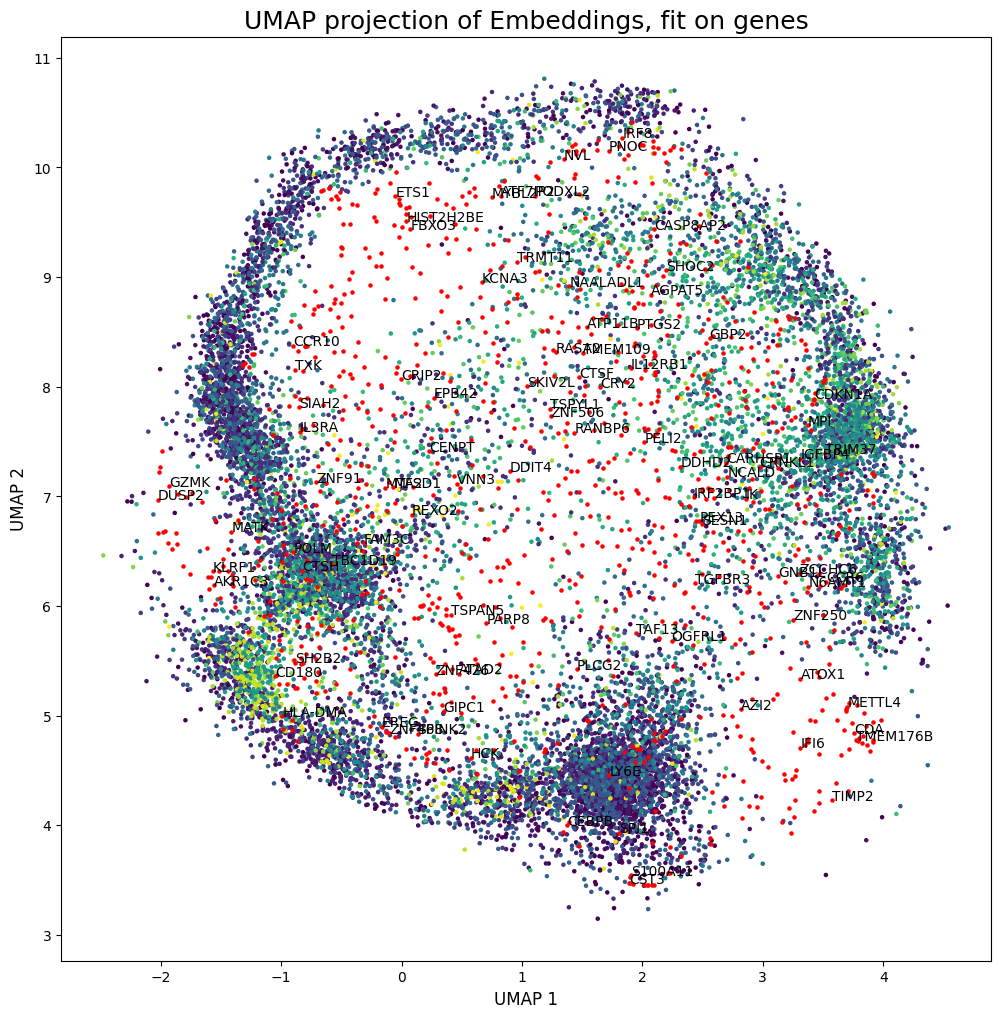

In [32]:
# UMAP

reducer = umap.UMAP(random_state=3)
embedding = reducer.fit_transform(gene_embeddings.detach().cpu().numpy())
cells = reducer.transform(cell_embeddings)

# Plot the reduced data
plt.figure(figsize=(12, 12))
plt.scatter(cells[:,0], cells[:,1], c=list(map(int,data.obs['louvain'].values)), s=5)
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, color='red')

# Annotate specific points
# replace with your genes of interest
for gene in vocab_dict.keys():
    if (gene not in ['<eoc>', '<pad>', '<cls>']) & (random.random() <= 0.1):
        index = vocab_dict[gene]
        plt.text(embedding[index, 0], embedding[index, 1], gene)

plt.title('UMAP projection of Embeddings, fit on genes', fontsize=18)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.show()


C:\Users\ronja\anaconda3\envs\transformer_bio\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


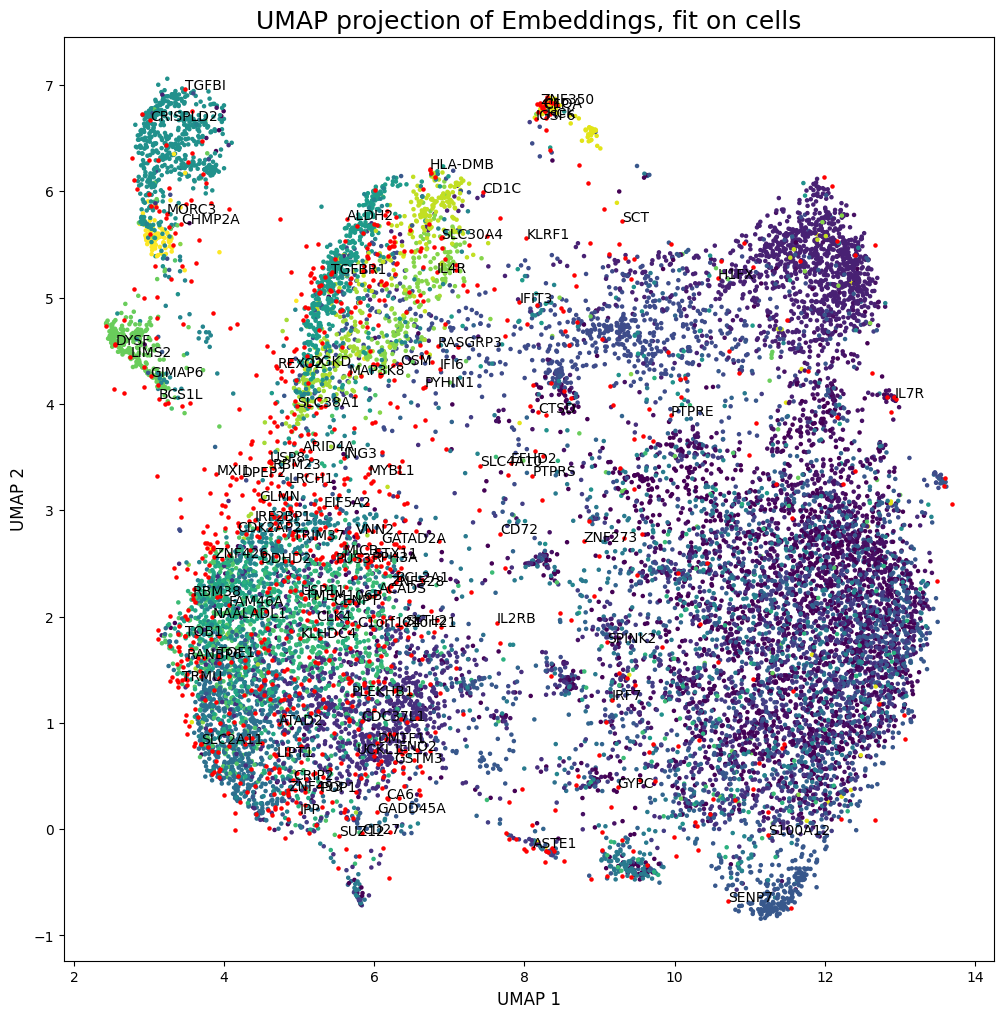

In [31]:
reducer = umap.UMAP(random_state=3)
cells = reducer.fit_transform(cell_embeddings)
embedding = reducer.transform(gene_embeddings.detach().cpu().numpy())


# Plot the reduced data
plt.figure(figsize=(12, 12))
plt.scatter(cells[:,0], cells[:,1], c=list(map(int,data.obs['louvain'].values)), s=5)
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, color='red')

# Annotate specific points
# replace with your genes of interest
for gene in vocab_dict.keys():
    if (gene not in ['<eoc>', '<pad>', '<cls>']) & (random.random() <= 0.1):
        index = vocab_dict[gene]
        plt.text(embedding[index, 0], embedding[index, 1], gene)

plt.title('UMAP projection of Embeddings, fit on cells', fontsize=18)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.show()

C:\Users\ronja\anaconda3\envs\transformer_bio\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


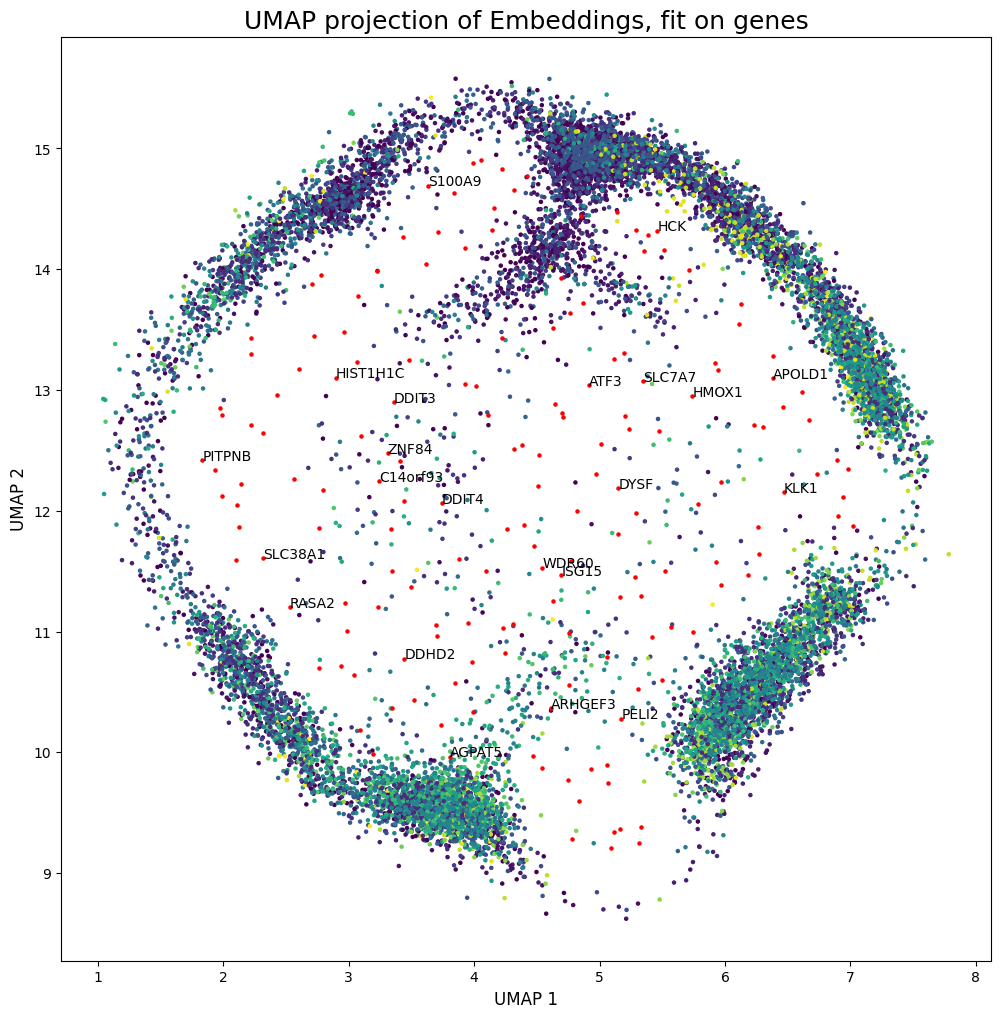

In [47]:
# With only present genes
reducer = umap.UMAP(random_state=3)
embedding = reducer.fit_transform(our_gene_embeddings.detach().cpu().numpy())
cells = reducer.transform(cell_embeddings)

# Plot the reduced data
plt.figure(figsize=(12, 12))
plt.scatter(cells[:,0], cells[:,1], c=list(map(int,data.obs['louvain'].values)), s=5)
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, color='red')

# Annotate specific points
# replace with your genes of interest
for gene in df_intersection.genes.values:
    if (gene not in ['<eoc>', '<pad>', '<cls>']) & (random.random() <= 0.1):
        index = np.where(df_intersection.genes.values == gene)[0]
        plt.text(embedding[index, 0], embedding[index, 1], gene)

plt.title('UMAP projection of Embeddings, fit on genes', fontsize=18)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.show()

C:\Users\ronja\anaconda3\envs\transformer_bio\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


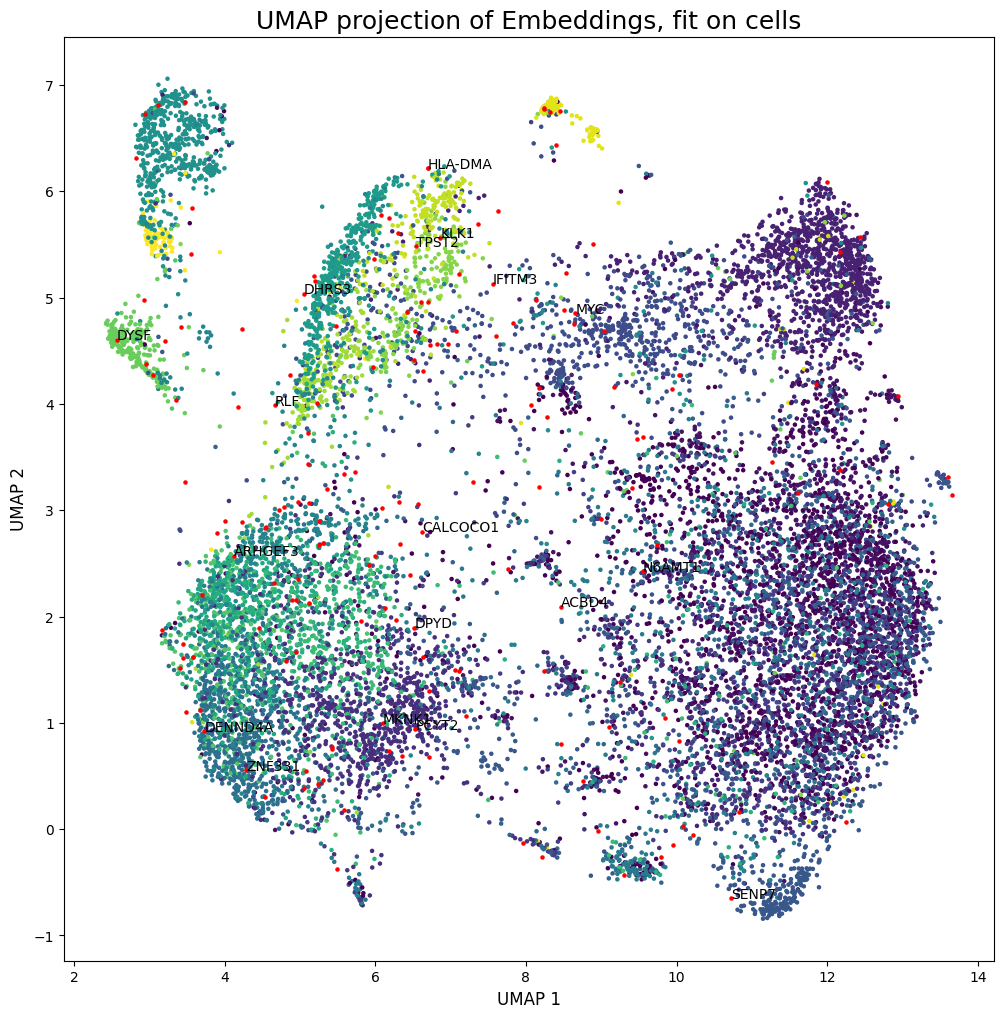

In [48]:
reducer = umap.UMAP(random_state=3)
cells = reducer.fit_transform(cell_embeddings)
embedding = reducer.transform(our_gene_embeddings.detach().cpu().numpy())


# Plot the reduced data
plt.figure(figsize=(12, 12))
plt.scatter(cells[:,0], cells[:,1], c=list(map(int,data.obs['louvain'].values)), s=5)
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, color='red')

# Annotate specific points
# replace with your genes of interest
for gene in df_intersection.genes.values:
    if (gene not in ['<eoc>', '<pad>', '<cls>']) & (random.random() <= 0.1):
        index = np.where(df_intersection.genes.values == gene)[0]
        plt.text(embedding[index, 0], embedding[index, 1], gene)

plt.title('UMAP projection of Embeddings, fit on cells', fontsize=18)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.show()

In [46]:
print(df_intersection.genes.values)
print(df_intersection.genes.index)
print(np.where(df_intersection.genes.values == 'BACE2')[0])

['BACE2' 'N6AMT1' 'CBX7' 'HMOX1' 'ZNF544' 'KLK1' 'ZNF302' 'ZNF91' 'ACP5'
 'MUM1' 'BLCAP' 'ZCCHC2' 'SLC9A3R1' 'ACBD4' 'CCR7' 'IGFBP4' 'GRAP' 'MVD'
 'KLHDC4' 'HERPUD1' 'MT2A' 'IGSF6' 'CTSH' 'C5AR1' 'CXCL3' 'TGFBI' 'MAP9'
 'CSF1R' 'CD83' 'PARP11' 'ALOX5AP' 'IER3' 'RASA2' 'CSTA' 'SENP7' 'EIF5A2'
 'BIRC3' 'FGL2' 'CAPG' 'DPYSL2' 'OSM' 'TYROBP' 'ESF1' 'BASP1' 'CYP27A1'
 'CEBPB' 'DENND4A' 'TTC33' 'IL7R' 'CCL4' 'FCGR2A' 'CD9' 'CTNNB1' 'ANXA1'
 'ABCA7' 'IL6' 'ZNF331' 'DPYD' 'FAM76A' 'ARHGEF3' 'NDE1' 'NELL2' 'MKNK1'
 'ISG15' 'PCYT2' 'PTGS2' 'SLC7A7' 'RASGRP3' 'USP11' 'MFGE8' 'PMS1'
 'FCER1G' 'FCGR2B' 'PTX3' 'ABL2' 'GIMAP6' 'ID1' 'ID3' 'HCK' 'RGS2' 'REXO2'
 'G0S2' 'ATF3' 'CD5' 'PITPNB' 'DDX46' 'LDHA' 'S100P' 'IER5' 'LIMS2'
 'CGRRF1' 'IL32' 'HLA-DPB1' 'GRAP2' 'TNFRSF1B' 'NT5E' 'AEBP1' 'CLK1' 'TTN'
 'FAM46C' 'S100A9' 'PTPN7' 'DHRS3' 'HLA-DMB' 'PRDM1' 'CDKN1A' 'HLA-DMA'
 'DDHD2' 'PLA2G7' 'PELI2' 'FAM46A' 'GZMB' 'NFKBIA' 'SLAMF7' 'NKG7' 'CRYZ'
 'SLC38A1' 'CNOT6' 'STEAP4' 'TPST2' 'DYSF' 'WDR60' 'IL3RA'

## For most expressed genes
```
    # normalize counts matrix so that each 'cell' (barcode) has counts summing to 1
    adata.X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)['X']
    
    # create new adata.var column contaning mean of each column of adata.X_norm above
    # this is total normalized counts per gene a.k.a. 'mean_total_expression'
    adata.var['mean_expression'] = np.ravel(adata.X_norm.mean(0))
    
    # return pd.DataFrame of n top-ranked genes by mean expression
    x = pd.DataFrame(adata.var.nlargest(n, 'mean_expression')['mean_expression'])
```

## Most variable genes

In [50]:
sc.pp.highly_variable_genes(final_data, n_top_genes=20)

In [58]:
print(final_data.var)
print(np.where(final_data.var.highly_variable == True)[0])
print(final_data.var.highly_variable == True)
highly_variable_genes_indices = np.where(final_data.var.highly_variable == True)[0]

        n_cells-0  n_cells-1  n_cells-2  n_cells-3  highly_variable     means  \
index                                                                           
BACE2      2404.0     1227.0     1224.0      635.0             True  0.923917   
N6AMT1      130.0      282.0      635.0      635.0            False  3.882117   
CBX7        984.0     1280.0     1062.0      635.0            False  1.540835   
HMOX1       833.0      185.0      353.0      635.0            False  2.858586   
ZNF544      206.0      388.0      803.0      635.0            False  3.377871   
...           ...        ...        ...        ...              ...       ...   
ZNF84       456.0      856.0     1236.0      635.0            False  2.749506   
CD14       1046.0      251.0      978.0      635.0            False  2.367502   
DBF4        183.0      322.0      452.0      635.0            False  3.778105   
ARID4A      725.0     1391.0     1630.0      635.0             True  2.046000   
PSMC6      1295.0     1739.0

C:\Users\ronja\anaconda3\envs\transformer_bio\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


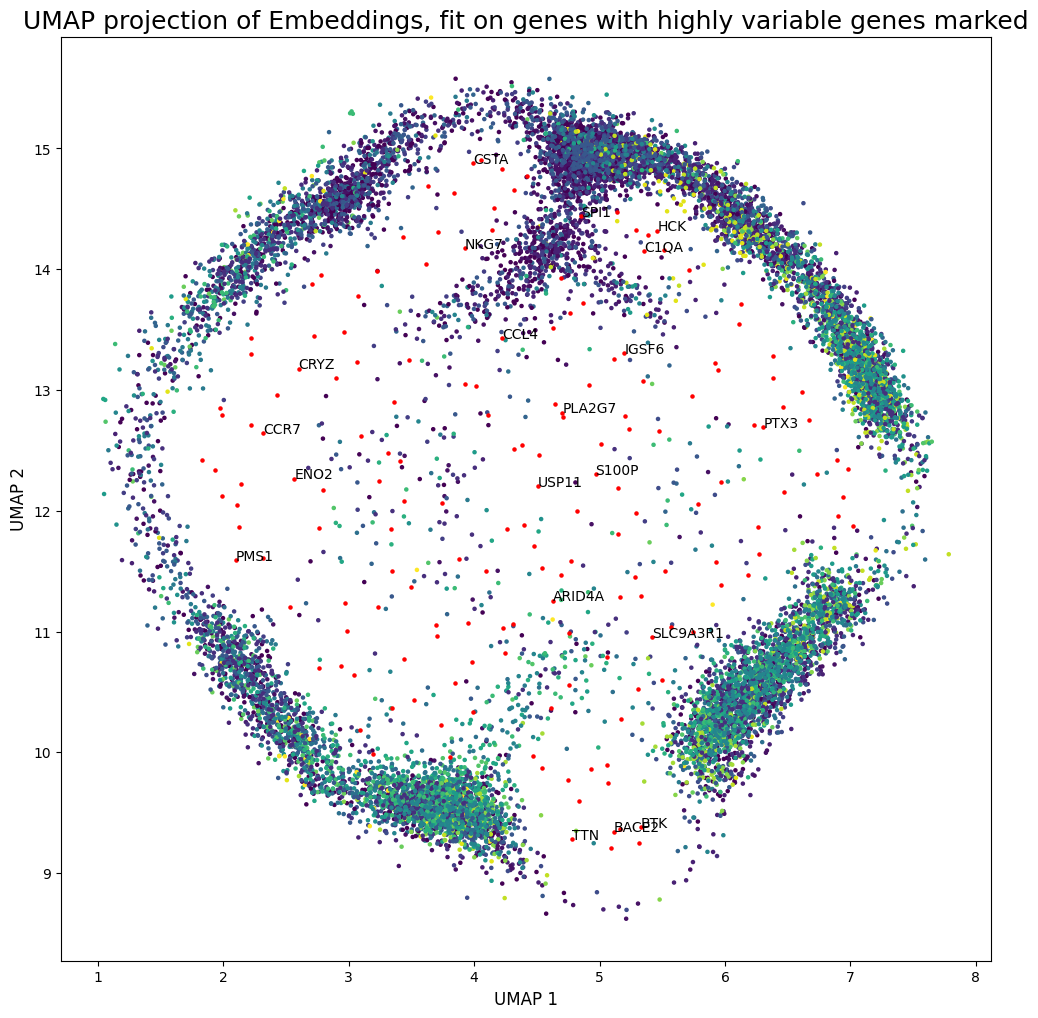

In [59]:
# With only present genes
reducer = umap.UMAP(random_state=3)
embedding = reducer.fit_transform(our_gene_embeddings.detach().cpu().numpy())
cells = reducer.transform(cell_embeddings)

# Plot the reduced data
plt.figure(figsize=(12, 12))
plt.scatter(cells[:,0], cells[:,1], c=list(map(int,data.obs['louvain'].values)), s=5)
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, color='red')

# Annotate specific points
# replace with your genes of interest
temp=0
for gene in df_intersection.genes.values:
    if (gene not in ['<eoc>', '<pad>', '<cls>']) & (temp in highly_variable_genes_indices):
        index = np.where(df_intersection.genes.values == gene)[0]
        plt.text(embedding[index, 0], embedding[index, 1], gene)
    temp += 1

plt.title('UMAP projection of Embeddings, fit on genes with highly variable genes marked', fontsize=18)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.show()

C:\Users\ronja\anaconda3\envs\transformer_bio\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\ronja\AppData\Local\Temp\ipykernel_36364\2772526369.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_celltype_values))


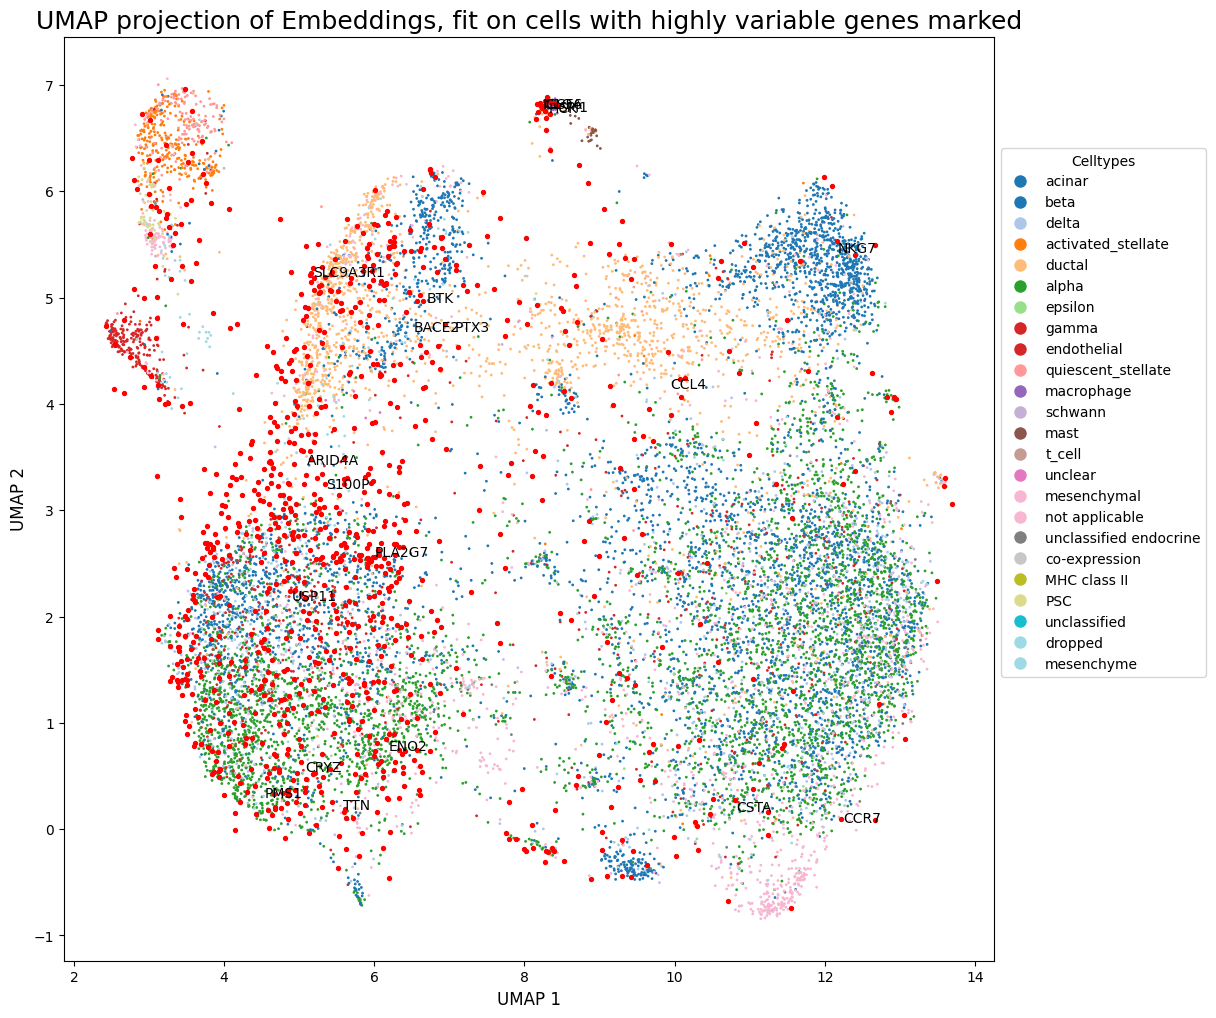

In [105]:
reducer = umap.UMAP(random_state=3)
cells = reducer.fit_transform(cell_embeddings)
embedding = reducer.transform(our_gene_embeddings.detach().cpu().numpy())
embeddings_all = reducer.transform(gene_embeddings.detach().cpu().numpy())

unique_celltype_values = data.obs.celltype.unique()

# Create a custom colormap with enough colors for all unique values
#cmap = plt.cm.get_cmap('viridis', len(unique_celltype_values))
cmap = plt.cm.get_cmap('tab20', len(unique_celltype_values))

# Map each unique value to a color
color_mapping = {val: cmap(i) for i, val in enumerate(unique_celltype_values)}

# Get colors for each data point based on the 'celltype' values
colors = [color_mapping[val] for val in data.obs.celltype.values]


# Plot the data
plt.figure(figsize=(12, 12))

scatter = plt.scatter(cells[:, 0], cells[:, 1], c=colors, s=1)

# Add legend
fake_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_mapping.values()]
plt.legend(fake_handles, unique_celltype_values, title='Celltypes', loc = 'lower left', bbox_to_anchor=(1, 0.3))
plt.scatter(embeddings_all[:, 0], embeddings_all[:, 1], s=8, color='red')

# Annotate specific points
# replace with your genes of interest
temp = 0
for gene in df_intersection.genes.values:
    if (gene not in ['<eoc>', '<pad>', '<cls>']) & (temp in highly_variable_genes_indices):
        index = np.where(df_intersection.genes.values == gene)[0]
        plt.text(embedding[index, 0], embedding[index, 1], gene)
    temp += 1

plt.title('UMAP projection of Embeddings, fit on cells with highly variable genes marked', fontsize=18)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.show()

In [101]:
sc.tl.score_genes(final_data, gene_list=final_data.var.index)

In [103]:
print(final_data.obs.score)

index
human1_lib1.final_cell_0001-0    0.079122
human1_lib1.final_cell_0002-0    0.102718
human1_lib1.final_cell_0003-0    0.099332
human1_lib1.final_cell_0004-0    0.148138
human1_lib1.final_cell_0005-0    0.094793
                                   ...   
reads.29499-3                    0.597806
reads.29500-3                    0.382734
reads.29501-3                    0.184293
reads.29502-3                    0.574016
reads.29503-3                    0.094205
Name: score, Length: 14693, dtype: float64
